<a href="https://colab.research.google.com/github/lorenzo-arcioni/Applied-Mathematics-Hub/blob/main/Algorithms/KNN/Notebooks/regressione_california.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importare le librerie necessarie
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Caricare il dataset California Housing
california = fetch_california_housing(as_frame=True)

X = california.data
y = california.target

features = X.columns
target = y.name

df = pd.concat([X, y], axis=1)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Applicare la normalizzazione dei dati
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Utilizzare KNN per la regressione
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fare previsioni sul test set
y_pred = knn.predict(X_test_scaled)

# Valutare le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.4015197569508185
Root Mean Squared Error: 0.6336558663429374


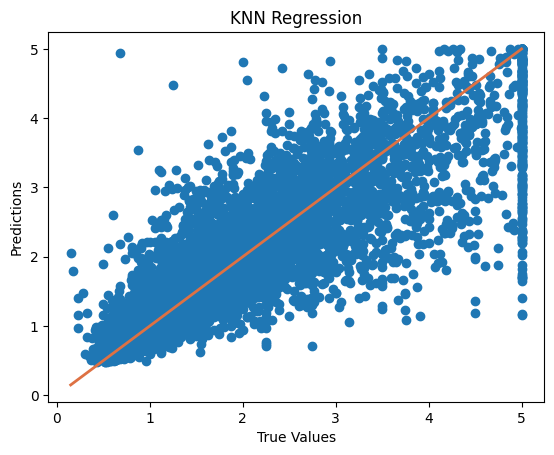

In [8]:
import matplotlib.pyplot as plt

# Visualizzazione dei risultati
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#de7143', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Regression')
plt.show()

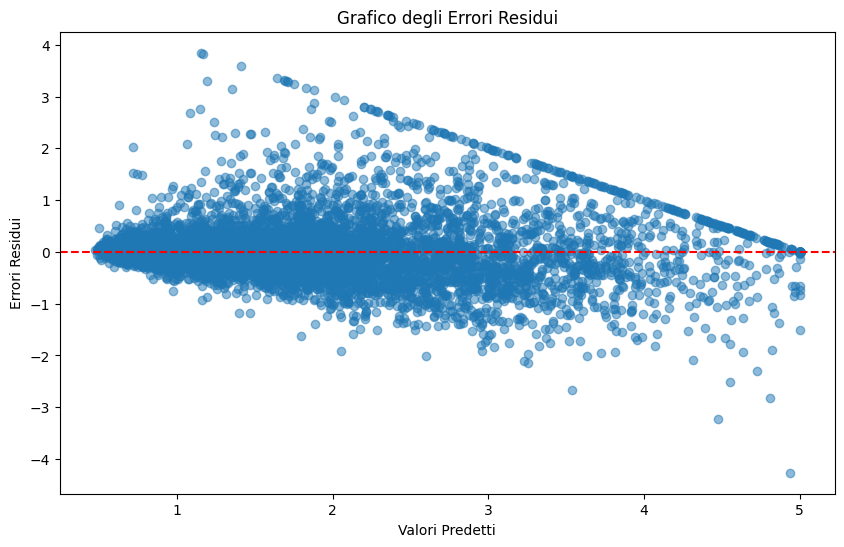

In [9]:
# Calcolare gli errori residui
residuals = y_test - y_pred

# Visualizzare il grafico degli errori residui
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valori Predetti")
plt.ylabel("Errori Residui")
plt.title("Grafico degli Errori Residui")
plt.show()

      Feature  Importance
0      MedInc    0.799991
6    Latitude    0.574775
7   Longitude    0.574307
1    HouseAge    0.105780
4  Population    0.011179
2    AveRooms    0.002590
3   AveBedrms    0.001881
5    AveOccup    0.000288


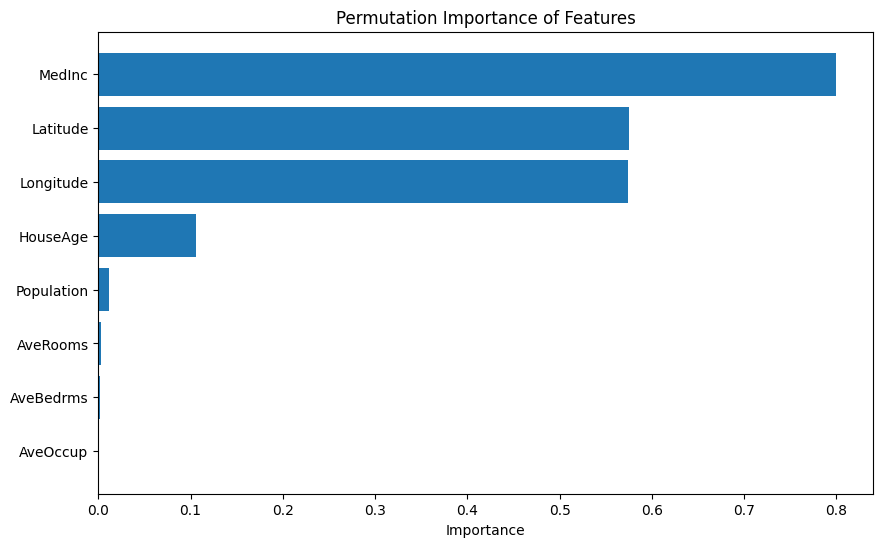

In [10]:
from sklearn.inspection import permutation_importance

# Calcolare la permutation importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Estrarre le importanze delle feature
feature_importances = result.importances_mean

# Creare un DataFrame per ordinare le feature in base alla loro importanza
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizzare l'importanza di tutte le feature
print(importance_df)

# Opzionalmente, visualizzare un grafico
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Permutation Importance of Features")
plt.show()

Mean Squared Error: 0.6343412682435549
Root Mean Squared Error: 0.7964554402121659


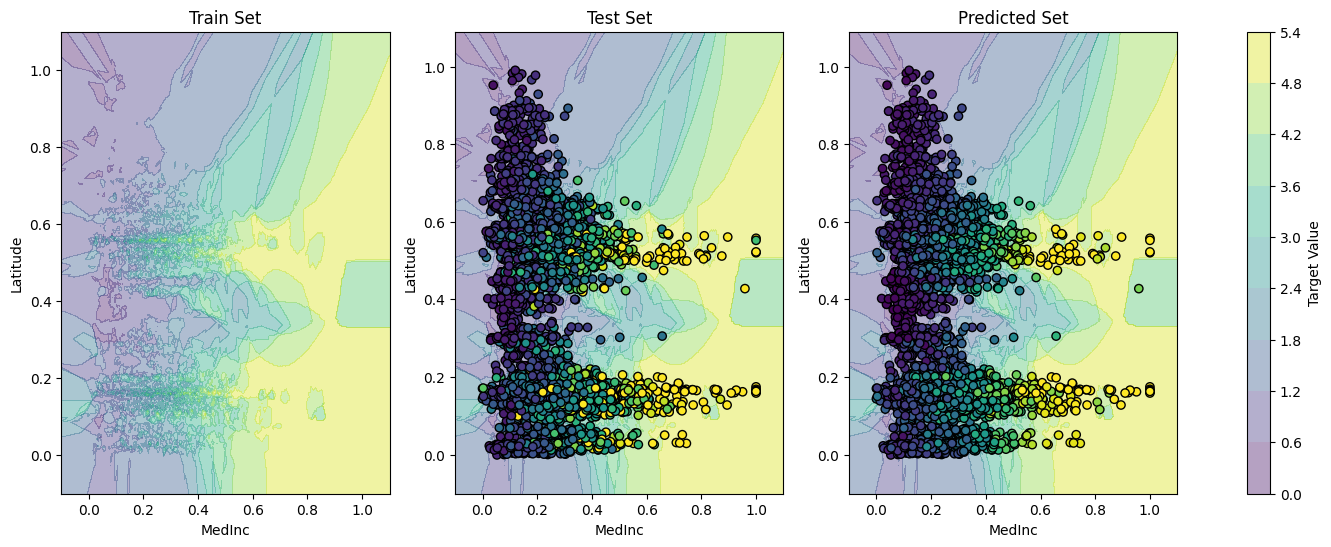

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# Selezionare le due features più importanti
selected_features = ["MedInc", "Latitude"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Ridimensionare solo le features selezionate
scaler = MinMaxScaler()
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_test_scaled_selected = scaler.transform(X_test_selected)

# Rifit il modello usando solo le features selezionate
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled_selected, y_train)

# Valutare le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Funzione per disegnare i decision boundaries in 2D
def plot_decision_boundary_2d(model, X, y, ax, title, plot_scatter=True):
    # Creare una griglia di punti
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                         np.arange(y_min, y_max, 0.005))

    # Predire i valori su tutta la griglia
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Disegnare i decision boundaries
    ax.contourf(xx, yy, Z, alpha=0.4)
    
    if plot_scatter:
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_title(title)

# Creare i tre subplot per i set di train, test e predizioni
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Train set: mostra solo i decision boundaries senza scatter
plot_decision_boundary_2d(knn, X_train_scaled_selected, y_train, axs[0], "Train Set", plot_scatter=False)

# Test set: mostra i decision boundaries e scatterplot
plot_decision_boundary_2d(knn, X_test_scaled_selected, y_test, axs[1], "Test Set")

# Predizioni: mostra i decision boundaries e scatterplot delle predizioni
y_pred = knn.predict(X_test_scaled_selected)
scatter_pred = plot_decision_boundary_2d(knn, X_test_scaled_selected, y_pred, axs[2], "Predicted Set")

# Aggiungere la colorbar
fig.colorbar(axs[2].collections[0], ax=axs, orientation='vertical', label='Target Value')

plt.show()

Mean Squared Error: 0.6343412682435549
Root Mean Squared Error: 0.7964554402121659


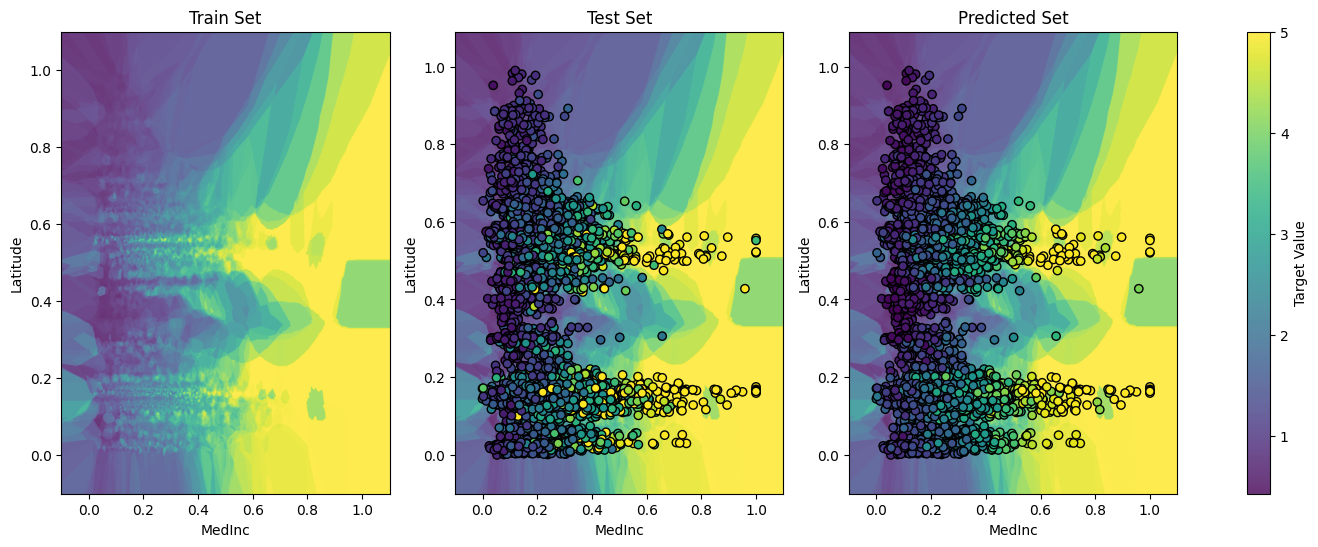

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Selezionare le due features più importanti
selected_features = ["MedInc", "Latitude"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Ridimensionare solo le features selezionate
scaler = MinMaxScaler()
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_test_scaled_selected = scaler.transform(X_test_selected)

# Rifit il modello usando solo le features selezionate
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled_selected, y_train)

# Valutare le prestazioni del modello
y_pred = knn.predict(X_test_scaled_selected)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Funzione per disegnare i decision boundaries in 2D usando imshow
def plot_decision_boundary_2d(model, X, y, ax, title, plot_scatter=True):
    # Creare una griglia di punti
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))

    # Predire i valori su tutta la griglia
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Disegnare l'immagine dei valori continui
    im = ax.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', aspect='auto', cmap='viridis', alpha=0.8)
    
    if plot_scatter:
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_title(title)
    
    return im

# Creare i tre subplot per i set di train, test e predizioni
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Train set: mostra solo i decision boundaries senza scatter
im_train = plot_decision_boundary_2d(knn, X_train_scaled_selected, y_train, axs[0], "Train Set", plot_scatter=False)

# Test set: mostra i decision boundaries e scatterplot
im_test = plot_decision_boundary_2d(knn, X_test_scaled_selected, y_test, axs[1], "Test Set")

# Predizioni: mostra i decision boundaries e scatterplot delle predizioni
im_pred = plot_decision_boundary_2d(knn, X_test_scaled_selected, y_pred, axs[2], "Predicted Set")

# Aggiungere la colorbar
fig.colorbar(im_pred, ax=axs, orientation='vertical', label='Target Value')

plt.show()